In [1]:
# From https://github.com/javedsha/text-classification/blob/master/Text+Classification+using+python,+scikit+and+nltk.ipynb
# https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a

#Loading the data set - training data. We will load the test data separately later in the example.
# http://qwone.com/~jason/20Newsgroups/ 
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

In [2]:
# You can check the target names (categories) and some data files by following commands.
twenty_train.target_names #prints all the categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
print("\n".join(twenty_train.data[0].split("\n")[:3])) #prints first line of the first data file

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu


In [4]:
# Extracting features from text files
# Text files are series of words (ordered). 
# In order to run ML algorithms we need to convert the text files into numerical feature vectors. 
# We will be using bag of words model for our example. 
# We segment each text file into words (for English splitting by space), and count # of times each word occurs in each document 
# and finally assign each word an integer id. 
# Each unique word in our dictionary will correspond to a feature (descriptive feature).

# Scikit-learn has a high level component which will create feature vectors for us ‘CountVectorizer’.

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html 

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(11314, 130107)

In [5]:
print(X_train_counts[1].toarray())

[[0 0 0 ... 0 0 0]]


In [6]:
# By doing ‘count_vect.fit_transform(twenty_train.data)’, we are learning the vocabulary dictionary and it returns a 
# Document-Term matrix. [n_samples, n_features].

# TF: Just counting the number of words in each document will give more weight to longer documents than shorter documents. 
# To avoid this, we can use frequency (TF - Term Frequencies) i.e. #count(word) / #Total words, in each document.

# TF-IDF: We can even reduce the weight of more common words like (the, is, an etc.) which occur in all the document. 
# This is called TF-IDF i.e Term Frequency times inverse document frequency.

# The last line will output the dimension of the Document-Term matrix.

In [7]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 130107)

In [8]:
# Running ML algorithms.
# Various algorithms can be used for text classification. Here we start with the most simplest one Naive Bayes (NB)

In [9]:
# Training Naive Bayes (NB) classifier on training data.

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [10]:
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
# We will be using the 'text_clf' going forward.
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

In [11]:
# Performance of NB Classifier. 
# Now we will test the performance of the NB classifier on test set.

import numpy as np
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)
predicted = text_clf.predict(twenty_test.data)
np.mean(predicted == twenty_test.target)


0.7738980350504514

In [12]:
print(twenty_test.data[10])
print(twenty_test.target[10])
print(twenty_test.target_names[10])
print(predicted[10])

From: Greg.Reinacker@FtCollins.NCR.COM
Subject: Windows On-Line Review uploaded
Reply-To: Greg.Reinacker@FtCollinsCO.NCR.COM
Organization: NCR Microelectronics, Ft. Collins, CO
Lines: 12

I have uploaded the Windows On-Line Review shareware edition to
ftp.cica.indiana.edu as /pub/pc/win3/uploads/wolrs7.zip.

It is an on-line magazine which contains reviews of some shareware
products...I grabbed it from the Windows On-Line BBS.

--
--------------------------------------------------------------------------
Greg Reinacker                          (303) 223-5100 x9289
NCR Microelectronic Products Division   VoicePlus 464-9289
2001 Danfield Court                     Greg.Reinacker@FtCollinsCO.NCR.COM
Fort Collins, CO  80525

2
rec.sport.hockey
2


In [13]:
# Training Support Vector Machines - SVM and calculating its performance
# https://scikit-learn.org/stable/modules/svm.html

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(twenty_train.data, twenty_train.target)
predicted_svm = text_clf_svm.predict(twenty_test.data)
np.mean(predicted_svm == twenty_test.target)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.8248805098247477

In [14]:
for i in range (20):
    print(f"{twenty_test.target[i]:5} - {twenty_test.target_names[i]} - {predicted_svm[i]}")

    7 - alt.atheism - 7
    5 - comp.graphics - 1
    0 - comp.os.ms-windows.misc - 0
   17 - comp.sys.ibm.pc.hardware - 17
   19 - comp.sys.mac.hardware - 0
   13 - comp.windows.x - 13
   15 - misc.forsale - 15
   15 - rec.autos - 2
    5 - rec.motorcycles - 5
    1 - rec.sport.baseball - 1
    2 - rec.sport.hockey - 2
    5 - sci.crypt - 1
   17 - sci.electronics - 17
    8 - sci.med - 8
    0 - sci.space - 15
    2 - soc.religion.christian - 3
    4 - talk.politics.guns - 2
    1 - talk.politics.mideast - 1
    6 - talk.politics.misc - 6
   16 - talk.religion.misc - 16


In [15]:
# Grid Search
# Here, we are creating a list of parameters for which we would like to do performance tuning. 
# All the parameters name start with the classifier name (remember the arbitrary name we gave). 
# E.g. vect__ngram_range; here we are telling to use unigram and bigrams and choose the one which is optimal.

from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}

In [16]:
# Next, we create an instance of the grid search by passing the classifier, parameters 
# and n_jobs=-1 which tells to use multiple cores from user machine.

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(twenty_train.data, twenty_train.target)

In [17]:
# To see the best mean score and the params, run the following code

gs_clf.best_score_
gs_clf.best_params_

# Output for above should be: The accuracy has now increased to ~90.6% for the NB classifier
# and the corresponding parameters are {‘clf__alpha’: 0.01, ‘tfidf__use_idf’: True, ‘vect__ngram_range’: (1, 2)}.

{'clf__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

In [18]:
# Similarly doing grid search for SVM
from sklearn.model_selection import GridSearchCV
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False),'clf-svm__alpha': (1e-2, 1e-3)}

gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(twenty_train.data, twenty_train.target)


gs_clf_svm.best_score_
gs_clf_svm.best_params_

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


{'clf-svm__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

In [19]:
# NLTK
# 1. Removing stop words: (the, then etc) from the data. We should do this only when stop words are not useful for 
#    the underlying problem. In most of the text classification problems, this is indeed not useful. 
#    Let’s see if removing stop words increases the accuracy. Update the code for creating an object of 
#    CountVectorizer as follows:

from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())])

In [20]:
# This pipeline was built for a NB classifier. This improves the accuracy from 77.38% to 81.69% (that is too good). 
# You can try the same for SVM and also while doing grid search.

# 2. FitPrior=False: When set it to false for MultinomialNB, a uniform prior will be used. 
#    This increases the accuracy from 81.69% to 82.14% (not much gain). Try and see if this works for your data set.
# 3. Stemming: Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form. E.g. A stemming algorithm reduces the words “fishing”, “fished”, and “fisher” to the root word, “fish”.
#    We use NLTK for this. NLTK comes with various stemmers which can help reducing the words to their root form. 

# Below we use Snowball stemmer which works very well for English language.

In [21]:
# Stemming Code

import nltk
nltk.download()

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
    
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect), ('tfidf', TfidfTransformer()), 
                             ('mnb', MultinomialNB(fit_prior=False))])

text_mnb_stemmed = text_mnb_stemmed.fit(twenty_train.data, twenty_train.target)

predicted_mnb_stemmed = text_mnb_stemmed.predict(twenty_test.data)

np.mean(predicted_mnb_stemmed == twenty_test.target)


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


0.8167817312798725

In [22]:
print(stemmed_count_vect)

StemmedCountVectorizer(stop_words='english')


In [23]:
print(predicted_mnb_stemmed)

[ 7  1  0 ...  9  3 15]


In [24]:
# The accuracy with stemming we get is ~81.67%. Marginal improvement in our case with NB classifier. 
# You can also try out with SVM and other algorithms.

# Conclusion: 
# We have learned the classic problem in NLP, text classification. We learned about important concepts like bag of words,
# TF-IDF and 2 important algorithms NB and SVM. We saw that for our data set, both the algorithms were almost equally matched
# when optimized. Sometimes, if we have enough data set, choice of algorithm can make hardly any difference. 
# We also saw, how to perform grid search for performance tuning and used NLTK stemming approach. 
# You can use this code on your data set and see which algorithms works best for you.

In [25]:
for i in range (20):
    print(f"{twenty_test.target[i]:5} - {twenty_test.target_names[i]} - {predicted_mnb_stemmed[i]}")
# print(twenty_test.data[10])   

    7 - alt.atheism - 7
    5 - comp.graphics - 1
    0 - comp.os.ms-windows.misc - 0
   17 - comp.sys.ibm.pc.hardware - 17
   19 - comp.sys.mac.hardware - 0
   13 - comp.windows.x - 13
   15 - misc.forsale - 15
   15 - rec.autos - 2
    5 - rec.motorcycles - 5
    1 - rec.sport.baseball - 1
    2 - rec.sport.hockey - 2
    5 - sci.crypt - 5
   17 - sci.electronics - 17
    8 - sci.med - 8
    0 - sci.space - 15
    2 - soc.religion.christian - 3
    4 - talk.politics.guns - 2
    1 - talk.politics.mideast - 1
    6 - talk.politics.misc - 6
   16 - talk.religion.misc - 16


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

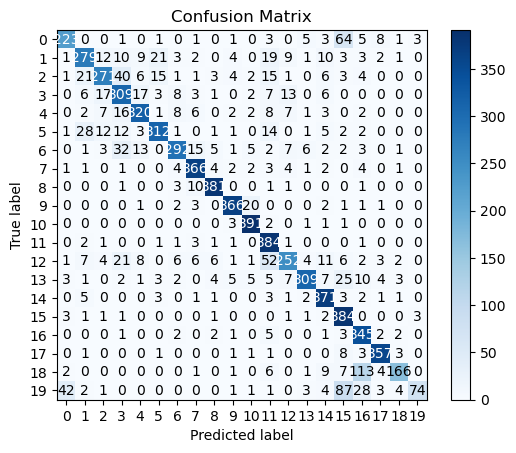

In [27]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(twenty_test.target, predicted_mnb_stemmed, normalize=False, title = 'Confusion Matrix')

In [ ]:
# https://github.com/AleksandarHaber/Introduction-to-Scikit-learn-Classification-and-Visualization/blob/main/visualizeFunctions.py
# https://secml.readthedocs.io/en/stable/tutorials/01-Training.html
# https://towardsdatascience.com/visualize-machine-learning-metrics-like-a-pro-b0d5d7815065